In [33]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
import seaborn as sns

In [34]:
X, y, cof = make_regression(n_samples=500, n_features=1, bias=4.2, noise=7.1, coef=True)
#cof has the coefficient of x
#basis has the y intercept
print X.shape, y.shape, cof
#print X
#print y

(500, 1) (500,) 6.985683264924436


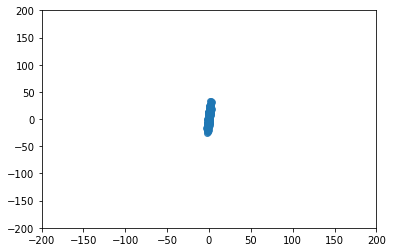

In [35]:
plt.xlim(-200, 200)
plt.ylim(-200, 200)
sns.regplot(X[:, 0], y,fit_reg=False)


In [36]:
split = int(0.8 * X.shape[0])

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(400, 1) (100, 1)
(400,) (100,)


In [37]:
# hypothesis function
#for logistc we ass h=(x*w).sum()+b where b is thw w[0] the intercept term where w is the bunch of weights and b is the bias number of dimentions =num of weights+1 bias term
#the sigmoid is calculated as 1.0/(1.0+np.exp(-1.0*z))
def hypothesis(x, w):
    return x*w[1] + w[0]
#for logistic add sigmoid

# error compute
#y_true is the actual y
#we compute y using w and x
def get_error(y_true, x, w):
    err = 0.0
    
    # Get number of examples
    m = x.shape[0]
    #m is the number of rows in the dataset (number of points)
    for ix in range(m):
        # for each example compute the square error
        err += (y_true[ix] - hypothesis(x[ix], w))**2
    # Get mean sq. error
    err = err / (2*m)
    return err
#for logistic add the error term of logistic -(yi=1).log(yi hat)+(-1)(yi=0).log(1-yi hat) where y hat is the prob of a point i being in class 1



# error gradient
#for logistic we del(y,x,w)/del w when we cal the gradient they end up comming the same gradient value as that of the linear regression
def get_grads(y_true, x, w):
    grad_00 = 0.0
    grad_01 = 0.0
    
    # Get number of examples
    m = x.shape[0]
    
    for ix in range(m):
        # for each example compute the gradients
        grad_00 += (y_true[ix] - hypothesis(x[ix], w))*(-1)
        grad_01 += (y_true[ix] - hypothesis(x[ix], w))*(-1*x[ix])
    
    # Get mean grads
    grad_00 = grad_00 / m
    grad_01 = grad_01 / m
    return [grad_00, grad_01]

# update weights using grad. desc.
# input data set x
#input data lables y
#current w
def grad_descent(x, y_true, w, learning_rate=0.1):
    error = get_error(y_true, x, w)
    [grad_00, grad_01] = get_grads(y_true, x, w)
    
    w[0] = w[0] - learning_rate*grad_00
    w[1] = w[1] - learning_rate*grad_01
    
    #now w is the new gradient
    return error, w

In [38]:
W = np.array([0.1, 0.1])
loss = []

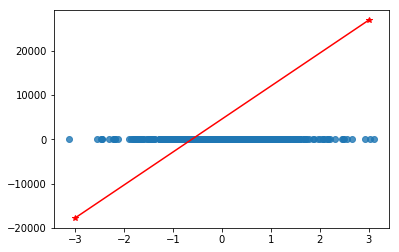

In [50]:
# for ix in range(100):

sns.regplot(X[:, 0], y,fit_reg=False)

y_0 = hypothesis(-3, W)
y_1 = hypothesis(3, W)

plt.plot([-3, 3], [y_0, y_1], 'r*-')
plt.show()

l, W = grad_descent(X_train, y_train, W, learning_rate=3)
loss.append(l)

# print loss

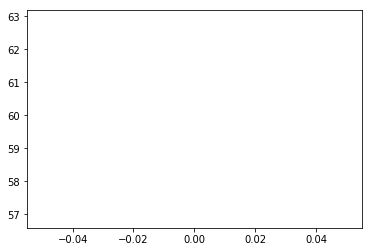

In [40]:
plt.plot(loss)
plt.show()

In [41]:
print W

[12.24235836 22.86132091]


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
#the score function calculated te accuracy
lr.score(X_test, y_test)

0.9830615475151747

In [32]:
np.log(0.3)

-1.2039728043259361